# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'

monster = "kro_2a"
filename = monster + "_20200813.csv"

max_skills = [4, 3, 2]

df = pd.read_csv(filename)
df_full = pd.read_csv(filename)
df_full = df_full[df_full["Stars"] == 6]
print(df.columns)
runes_cols = ["Slot" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Eff"], ascending=False, inplace=True)
df

Index(['Level', 'Stars', 'HP', 'Attack', 'Defense', 'Speed', 'Res', 'Acc',
       'CRate', 'CDmg', 'Eff', 'Eff.HP', 'Sets', 'Skillups', 'Acquired',
       'Slot1', 'Slot2', 'Slot3', 'Slot4', 'Slot5', 'Slot6'],
      dtype='object')


,Level,Stars,HP,Attack,Defense,Speed,Res,Acc,CRate,CDmg,...,Eff.HP,Sets,Skillups,Acquired,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6
382,40,6,21575,2583,1112,171,55,13,80,160,...,108565,Endure + Endure + Nemesis,"[1, 1, 1]",2019-08-05,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%
288,40,6,18975,2237,956,181,22,23,101,220,...,85121,Blade + Rage,"[4, 3, 2]",2019-01-26,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%
281,40,6,21272,2191,802,179,27,33,81,188,...,83960,Violent + Will,"[3, 3, 2]",2019-01-16,ATK+,ATK%,DEF+,CDmg%,HP+,HP%
353,40,6,18214,2629,1081,186,23,35,82,154,...,89676,Fatal + Focus,"[1, 1, 1]",2018-11-14,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%
176,40,6,15252,2520,868,168,21,23,89,232,...,63722,Rage,"[4, 3, 2]",2020-08-04,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,40,6,15908,1934,784,138,23,0,31,78,...,61786,Fatal,"[1, 1, 1]",2020-05-12,ATK+,SPD,DEF+,ATK%,HP+,ATK%
52,35,5,9791,1503,589,135,15,9,48,80,...,31346,Blade + Fatal,"[1, 1, 1]",2019-07-16,ATK+,ATK%,DEF+,ATK%,HP+,ATK%
337,40,6,14131,980,802,131,45,8,23,67,...,55775,Violent,"[2, 1, 1]",2018-04-25,ATK+,ATK%,DEF+,DEF%,HP+,RES%
2,24,5,9990,693,429,112,44,11,21,88,...,26389,Violent,"[1, 1, 1]",2019-11-22,ATK+,HP%,DEF+,CDmg%,HP+,ATK%


# Stars Distribution, picking 6*

(523, 21)


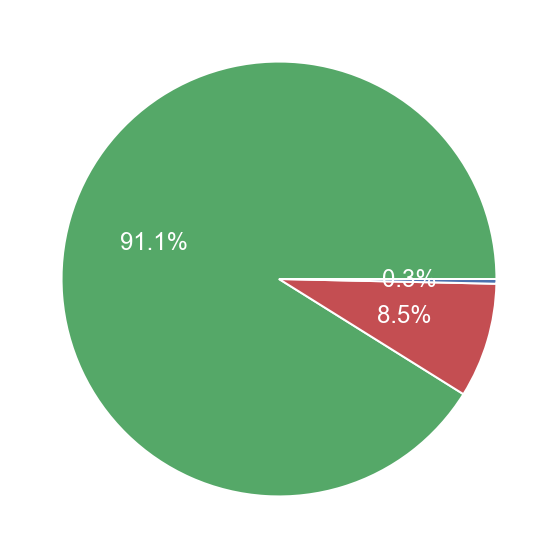

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Runes 

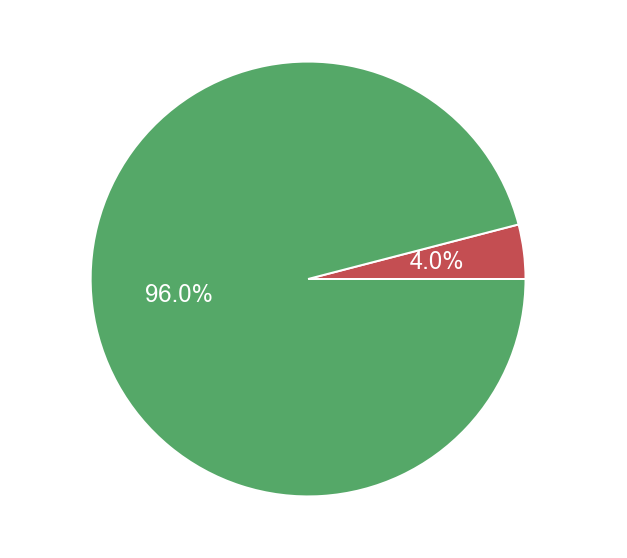

In [3]:
fig = plt.figure(figsize=(10, 10))
df_runes = {
    'Without\nRunes': df_full.shape[0] - df_stars6.shape[0],
    'With\nRunes': df_stars6.shape[0],
}
plt.pie(df_runes.values(), labels=df_runes.keys(), autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_runes.png", transparent=True, bbox_inches = "tight")
plt.show()

# Skilled Up

{'None': 403, 'All': 54, 'Only 3rd': 6, '2nd & 3rd': 7}


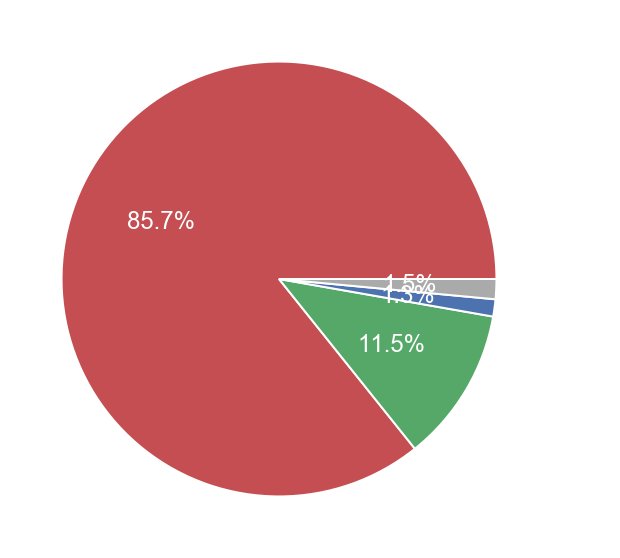

In [27]:
skills_count = {}

for value, count in df_stars6['Skillups'].value_counts().items():
    skillups = eval(value)
    if skillups == max_skills:
        skills_count['All'] = count
    elif skillups[:2] == max_skills[:2] and count > 5:
        skills_count['1st & 2nd'] = count
    elif [skillups[0], skillups[2]] == [max_skills[0], max_skills[2]] and count > 5:
        skills_count['1st & 3rd'] = count
    elif skillups[1:] == max_skills[1:] and count > 5:
        skills_count['2nd & 3rd'] = count
    elif skillups[0] == max_skills[0] and count > 5:
        skills_count['Only 1st'] = count
    elif skillups[1] == max_skills[1] and count > 5:
        skills_count['Only 2nd'] = count
    elif skillups[2] == max_skills[2] and count > 5:
        skills_count['Only 3rd'] = count
    else:
        if 'None' not in skills_count.keys():
            skills_count['None'] = 0
        skills_count['None'] += count

print(skills_count)
fig = plt.figure(figsize=(10, 10))
plt.pie(list(skills_count.values()), labels=skills_count.keys(), autopct='%1.1f%%', colors=['r', 'g', 'b', '#aaaaaa'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

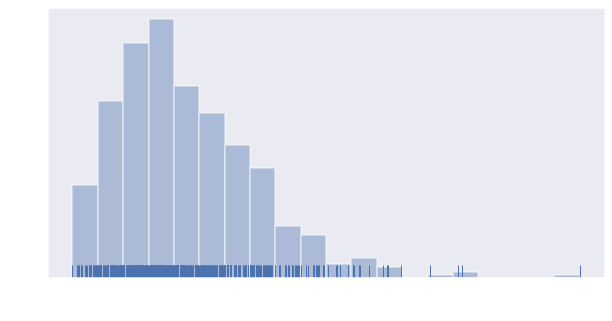

In [5]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff.HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# HP Distribution

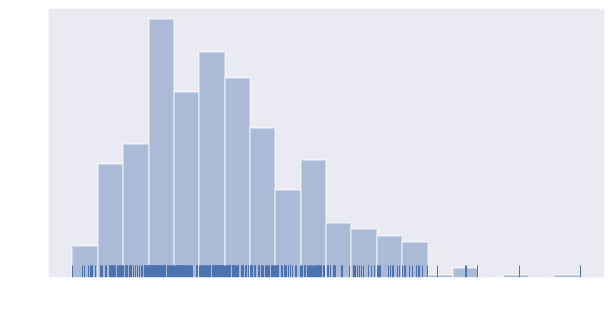

In [6]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_hp.png", transparent=True, bbox_inches = "tight")

# Attack Distribution

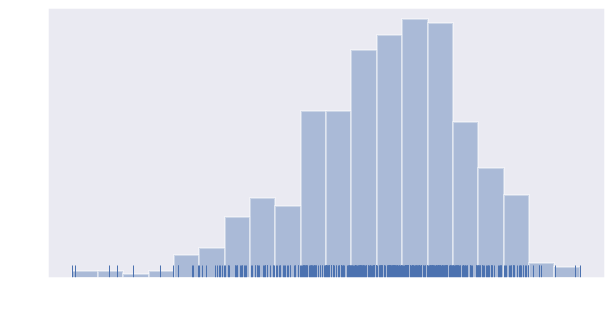

In [7]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Attack"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_attack.png", transparent=True, bbox_inches = "tight")

# Critical Rate Distribution

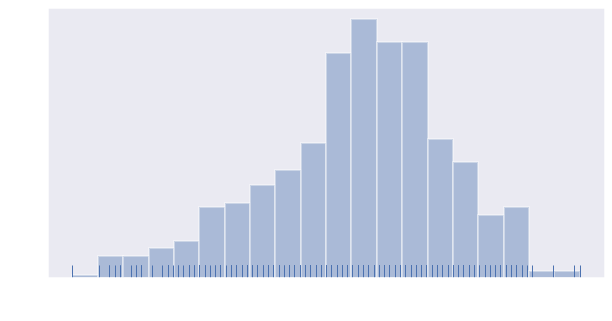

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["CRate"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_critrate.png", transparent=True, bbox_inches = "tight")

# Critical Damag Distribution

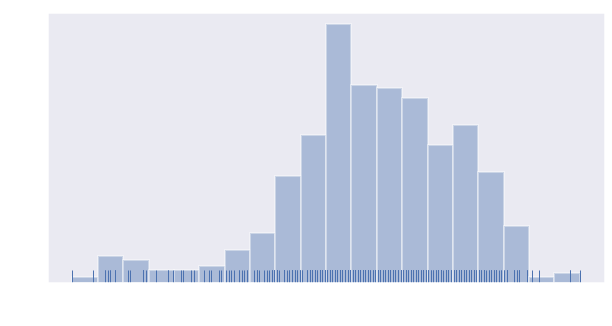

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["CDmg"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_critdmg.png", transparent=True, bbox_inches = "tight")

# Defense Distribution

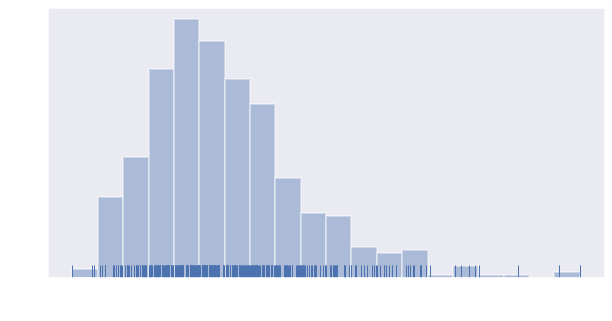

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Defense"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_defense.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

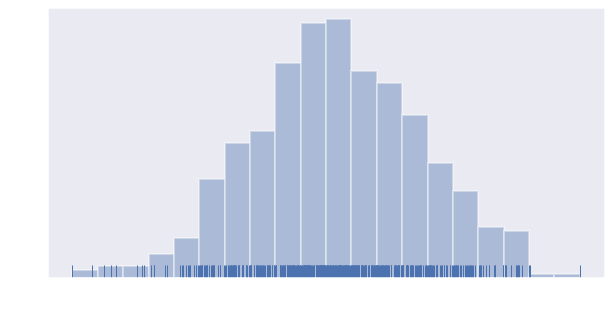

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Accuracy Distribution

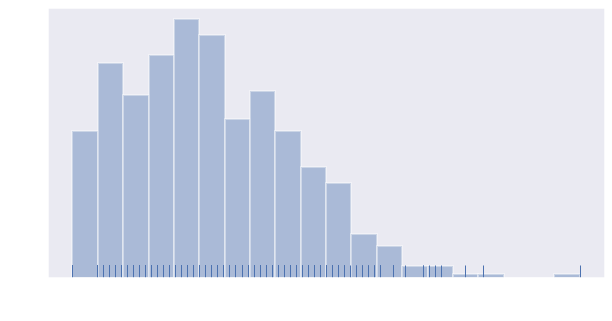

In [12]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Acc"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_acc.png", transparent=True, bbox_inches = "tight")

# Resistance Distribution

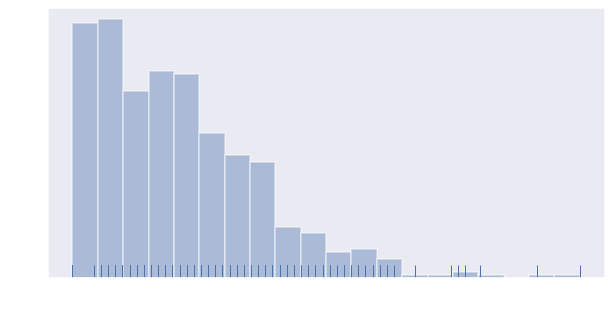

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Res"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_res.png", transparent=True, bbox_inches = "tight")

# Sets

Blade + Rage         94
Blade + Fatal        71
Rage                 42
Fatal                31
Blade + Violent      23
Blade                18
Rage + Revenge       16
Violent              15
Energy + Fatal       11
Focus + Rage         11
Blade + Swift        10
Revenge + Vampire     9
Broken                9
Revenge + Violent     9
Fatal + Revenge       9
Energy + Rage         8
Fatal + Focus         6
Blade + Vampire       6
Rage + Shield         5
Fight + Rage          5
Blade + Blade         5
Destroy + Rage        4
Swift                 4
Blade + Energy        4
Energy + Violent      4
Name: Sets, dtype: int64


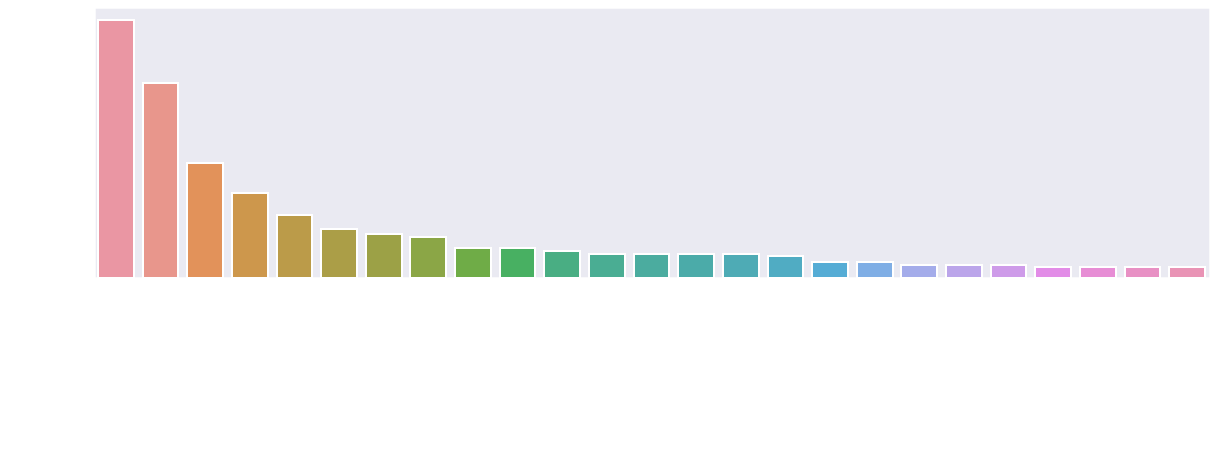

In [14]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 3]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# 4-Rune Sets

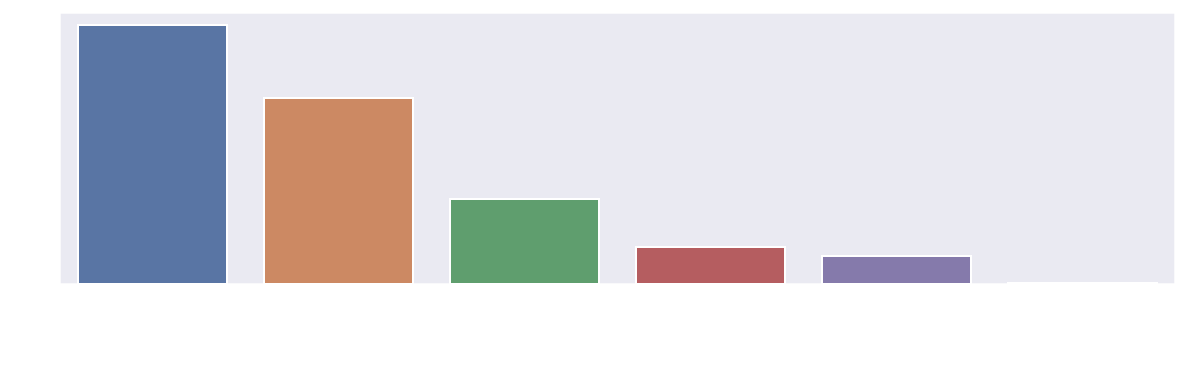

In [15]:
sets_4 = ['Violent', 'Swift', 'Rage', 'Fatal', 'Despair', 'Vampire']
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
set_sum = dict()
for set_4 in sets_4:
    indexes = [val for val in counts.index if set_4 in val]
    set_count = counts.loc[indexes]
    set_sum[set_4] = set_count.sum()
set_sum = {k: v for k, v in sorted(set_sum.items(), key=lambda item: item[1], reverse=True)}
x, y = list(set_sum.keys()), list(set_sum.values())
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_4sets.png", transparent=True, bbox_inches = "tight")

# Speed Distribution

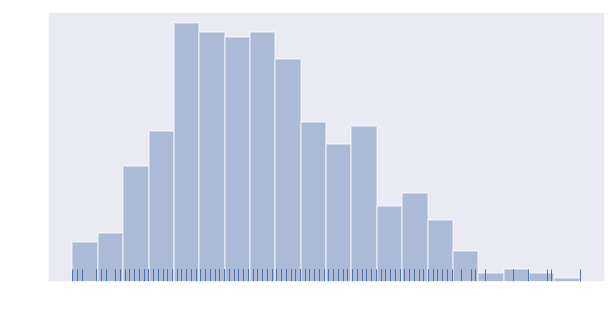

In [16]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Average & Best by Category

In [17]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Res', 'Acc', 'CRate', 'CDmg', 'Eff', 'Eff.HP']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

best = list()
for column in cols:
    best.append(int(round(df.sort_values([column], ascending=False)[column].head(1).values[0])))

df_best.loc[1] = best
print("Average")
display(df_stars6[cols].describe().loc['mean'])
print("Best")
display(df_best)

Average


HP         15891.569790
Attack      2069.718929
Defense      911.931166
Speed        151.625239
Res           29.845124
Acc           22.747610
CRate         71.877629
CDmg         168.529637
Eff           80.561912
Eff.HP     69049.778203
Name: mean, dtype: float64

Best


,HP,Attack,Defense,Speed,Res,Acc,CRate,CDmg,Eff,Eff.HP
ID,,,,,,,,,,
1,26250,2764,1458,218,86,84,114,251,106,146146


# Best 10 Builds by Avg Eff

In [18]:
print(df_stars6.drop(['Acquired', 'Slot1', 'Slot3', 'Slot5', 'Level', 'Stars', 'Skillups'], axis=1).reset_index(drop=True).sort_values(['Eff'], ascending=False).head(10).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HP</th>
      <th>Attack</th>
      <th>Defense</th>
      <th>Speed</th>
      <th>Res</th>
      <th>Acc</th>
      <th>CRate</th>
      <th>CDmg</th>
      <th>Eff</th>
      <th>Eff.HP</th>
      <th>Sets</th>
      <th>Slot2</th>
      <th>Slot4</th>
      <th>Slot6</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>21575</td>
      <td>2583</td>
      <td>1112</td>
      <td>171</td>
      <td>55</td>
      <td>13</td>
      <td>80</td>
      <td>160</td>
      <td>105.76</td>
      <td>108565</td>
      <td>Endure + Endure + Nemesis</td>
      <td>ATK%</td>
      <td>CDmg%</td>
      <td>ATK%</td>
    </tr>
    <tr>
      <th>1</th>
      <td>18975</td>
      <td>2237</td>
      <td>956</td>
      <td>181</td>
      <td>22</td>
      <td>23</td>
      <td>101</td>
      <td>220</td>
      <td>100.66</td>
      <td>85121</td>
      <td>Blade + Rage</td

# Most common Builds

   Slot2  Slot4 Slot6  Count
2   ATK%  CDmg%  ATK%    405
18   SPD  CDmg%  ATK%     55
0   ATK%   ATK%  ATK%     11
5   ATK%  CDmg%   HP%      8
12   HP%  CDmg%  ATK%      7


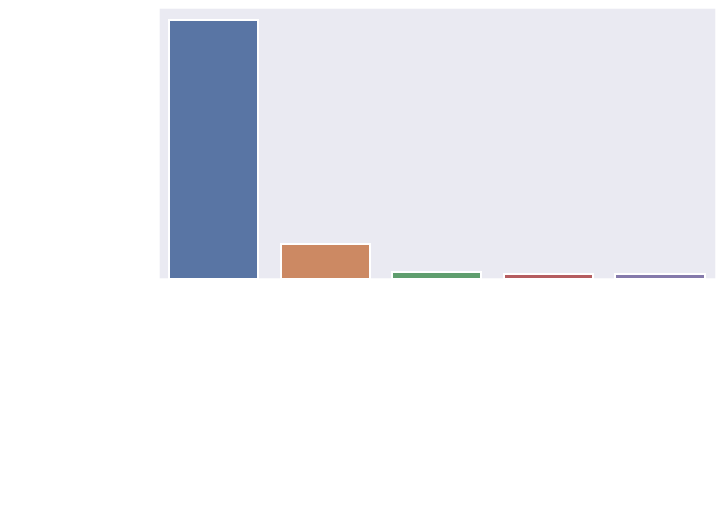

In [19]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Slot2", "Slot4", "Slot6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 5].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Slot2", "Slot4", "Slot6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

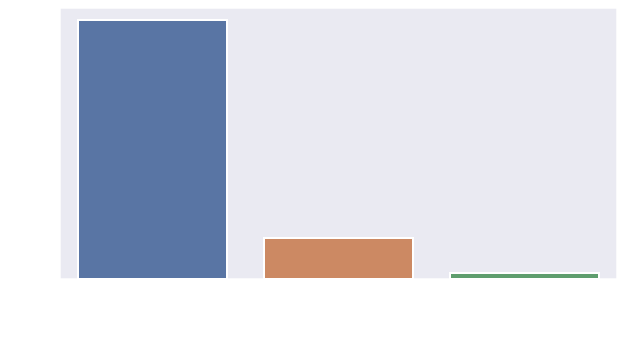

In [20]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Slot2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 2]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

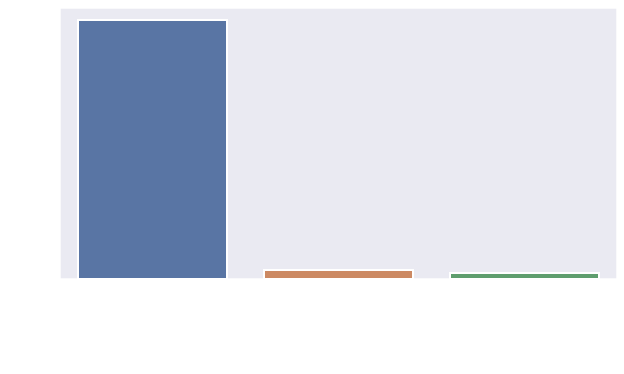

In [21]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Slot4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 2]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

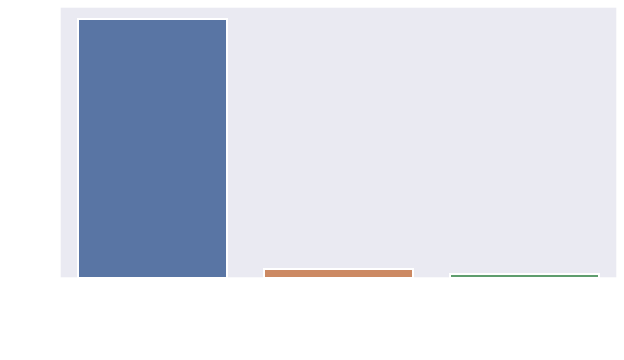

In [22]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Slot6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 2]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")